In [8]:
%matplotlib ipympl
# %matplotlib widget

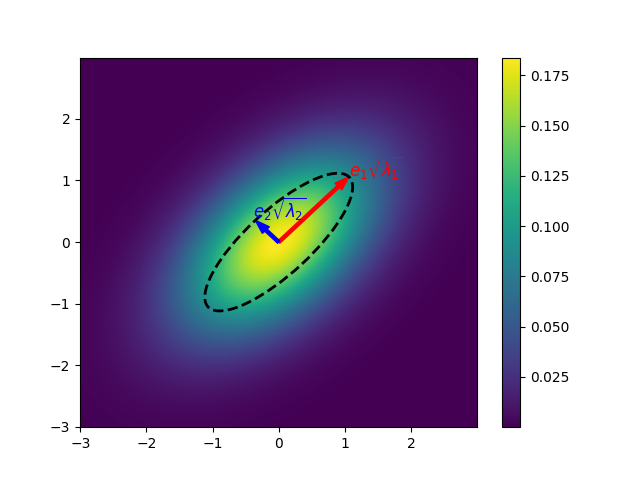

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

# Define the mean and covariance matrix
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Create a grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# Create the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
w, v = np.linalg.eig(cov)

# Plot the distribution and eigenvectors/eigenvalues with labels and ellipse
fig = plt.figure()
ax = fig.add_subplot(111)
gradient = ax.pcolormesh(x, y, rv.pdf(pos), shading='auto', cmap='viridis')
# gradient = ax.pcolormesh(x, y, rv.pdf(pos), shading='auto', cmap='jet')
ax.arrow(mean[0], mean[1], v[0][0]*w[0], v[1][0]*w[0], color='red', width=0.05, length_includes_head=True)
ax.arrow(mean[0], mean[1], v[0][1]*w[1], v[1][1]*w[1], color='blue', width=0.05, length_includes_head=True)
ax.text(v[0][0]*w[0], v[1][0]*w[0], '$e_1\sqrt{\lambda_1}$', color='red', fontsize=12)
ax.text(v[0][1]*w[1]*1.1, v[1][1]*w[1]*1.1, '$e_2\sqrt{\lambda_2}$', color='blue', fontsize=12)

# Add a colorbar
cbar = plt.colorbar(gradient)

# Add an ellipse to the plot
ellipse = Ellipse((mean[0], mean[1]), w[0]*2, w[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
ax.add_artist(ellipse)
ellipse.set_clip_box(ax.bbox)
ellipse.set_edgecolor('black')
ellipse.set_facecolor('none')
ellipse.set_linestyle('dashed')
ellipse.set_linewidth(2)

plt.show()

https://matplotlib.org/stable/tutorials/introductory/animation_tutorial.html#artistanimation

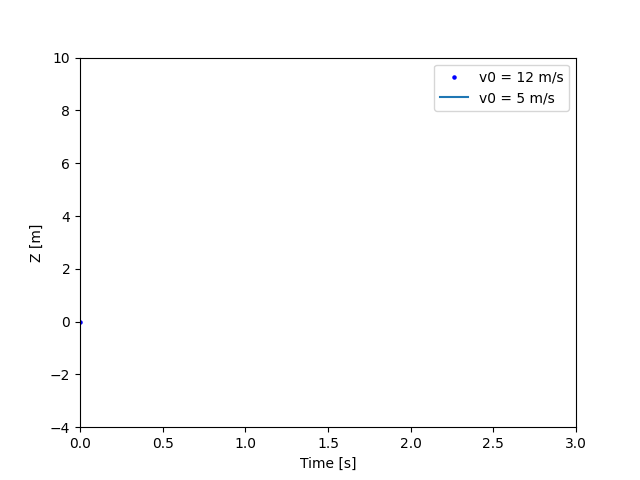

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()